In [3]:
!pip install pulp
import pulp

# A blending problem

# Problem Description


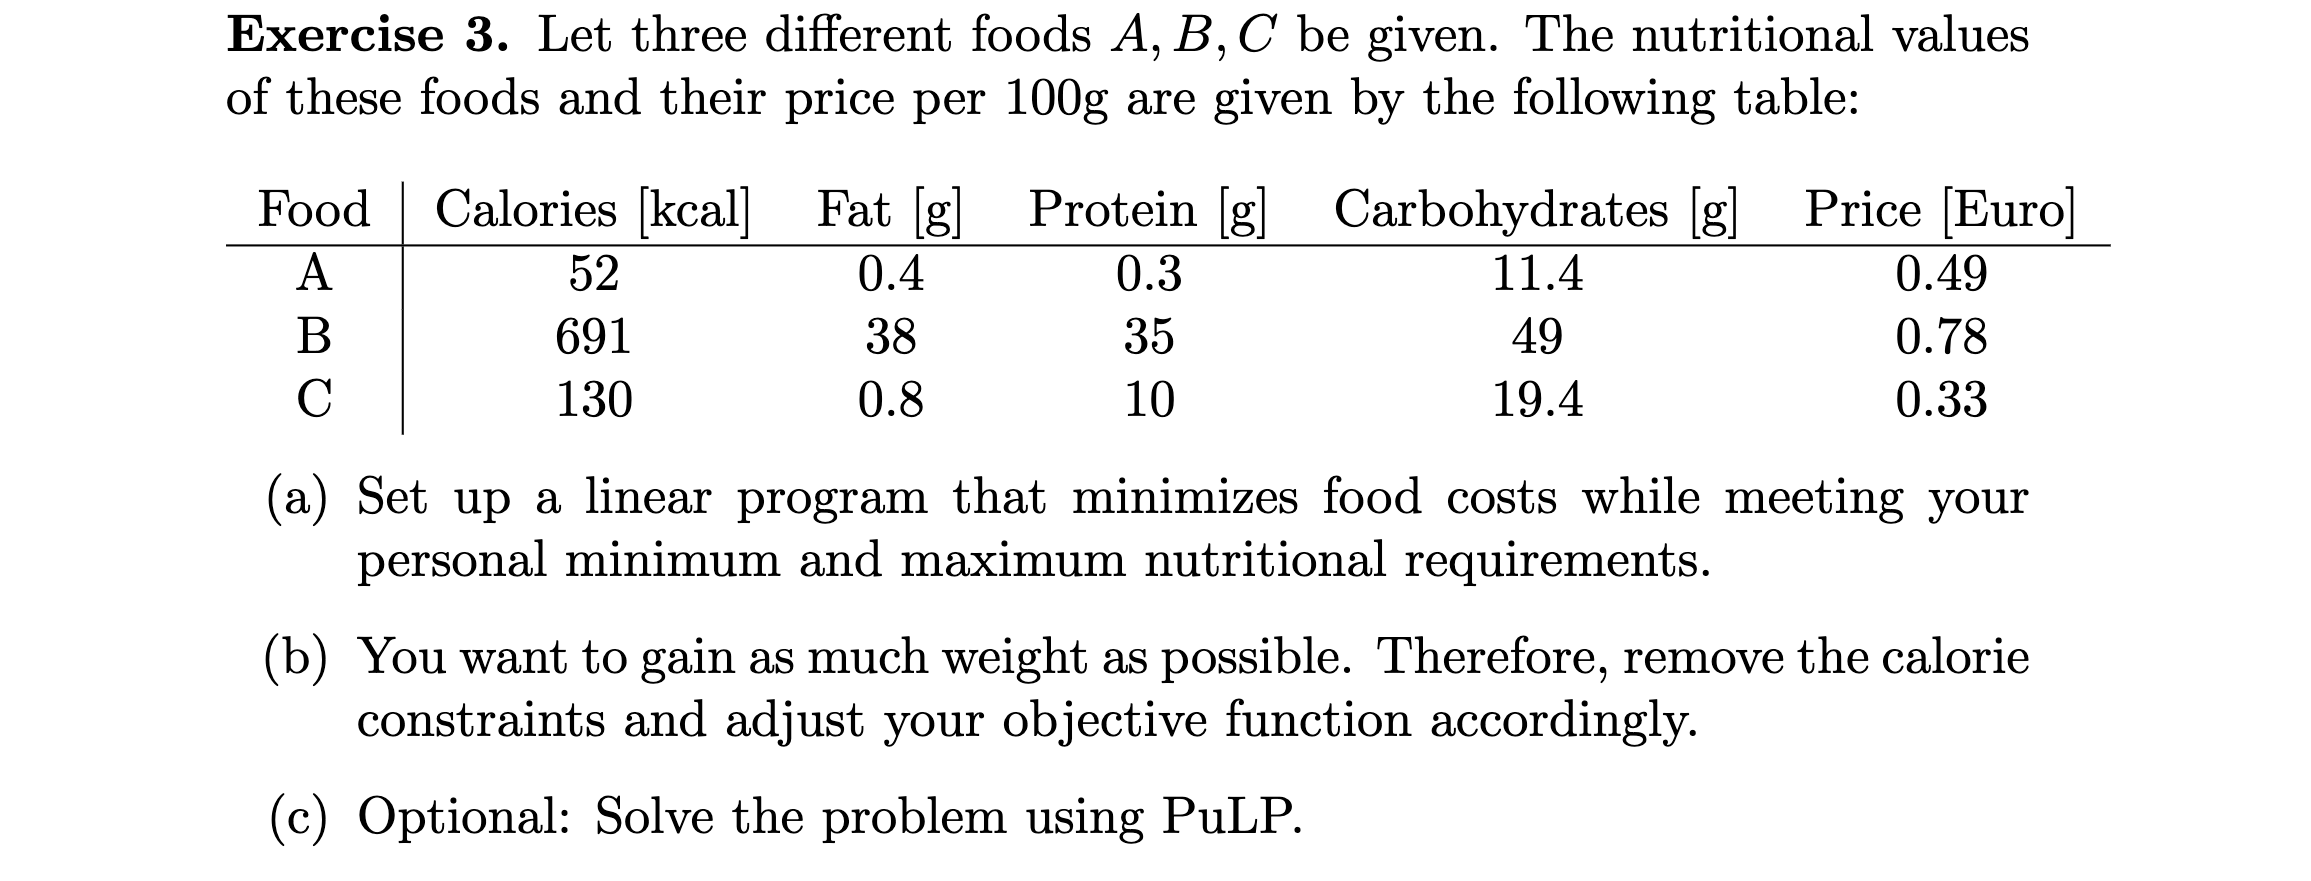

# 0 Data

In [4]:
# Creates a list of the Ingredients
Ingredients = ["A", "B", "C"]

# A dictionary of the costs of each of the Ingredients is created
costs = {
    "A": 0.49,
    "B": 0.78,
    "C": 0.33,
}

# A dictionary of the calories percent in each of the Ingredients is created
caloriesPercent = {
    "A": 52,
    "B": 691,
    "C": 130,
}

# A dictionary of the fat percent in each of the Ingredients is created
fatPercent = {
    "A": 0.4,
    "B": 38,
    "C": 0.8,
}

# A dictionary of the protein percent in each of the Ingredients is created
proteinPercent = {
    "A": 0.3,
    "B": 35,
    "C": 10,
}


# A dictionary of the carbohydtares percent in each of the Ingredients is created
carbohydtaresPercent = {
    "A": 11.4,
    "B": 49,
    "C": 19.4,
}

# 1 Initialize problem

In [5]:
prob = pulp.LpProblem("WhiskasProblem", pulp.LpMinimize)

# 2 Declare decision variables

In [6]:
# percentage of ingredient in a can of cat food
ingredient_vars = pulp.LpVariable.dicts("Ingr", Ingredients, lowBound=0, cat='Continuous')

# 3 Define objective function

In [7]:
prob += pulp.lpSum([costs[ingredient] * ingredient_vars[ingredient] for ingredient in Ingredients])

# 4 Define constraints

In [11]:
prob += pulp.lpSum([ingredient_vars[ingredient] for ingredient in Ingredients]) == 100 # a can contains 100g
prob += pulp.lpSum([proteinPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 9.0 # Protein requirement
prob += pulp.lpSum([fatPercent[i] * ingredient_vars[i] for i in Ingredients]) >= 7.0 # Fat requirement
prob += pulp.lpSum([caloriesPercent[i] * ingredient_vars[i] for i in Ingredients]) <= 2.0 # Calories requirement
prob += pulp.lpSum([carbohydtaresPercent[i] * ingredient_vars[i] for i in Ingredients]) <= 4.0 # carbohydtares requirement

# 5 Solve the problem

In [12]:
prob.solve()

if prob.status == 1:
    print(f'Solution is optimal: {pulp.constants.LpStatusOptimal == 1}')
    for ingredient in ingredient_vars.keys():
        print(f'Optimal value for {ingredient} = {ingredient_vars[ingredient].varValue}')
    print(f'Total costs: {sum(ingredient_vars[ingredient].varValue * costs[ingredient] for ingredient in ingredient_vars.keys())}')
else:
    print(f'Failed to find solution: {pulp.LpStatus[model.status]}')

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/anchal/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/n7/j3y48f614k54_fs37n2khdc40000gn/T/2ca4a513311e4f7fbd1262b92b2597fd-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/n7/j3y48f614k54_fs37n2khdc40000gn/T/2ca4a513311e4f7fbd1262b92b2597fd-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 15 COLUMNS
At line 49 RHS
At line 60 BOUNDS
At line 61 ENDATA
Problem MODEL has 10 rows, 3 columns and 30 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve determined that the problem was infeasible with tolerance of 1e-08
Analysis indicates model infeasible or unbounded
0  Obj 0 Primal inf 250.71023 (6)
2  Obj 71.72 Primal inf 942.08464 (5)
Primal infeasible - objective value 71.72
PrimalInfeasible objective 71.72 - 2 iterations time 0.002

Result - Linear re

NameError: name 'model' is not defined